## Name : Tharindu O.K.D
## Index No. : 190622R

### Question 01

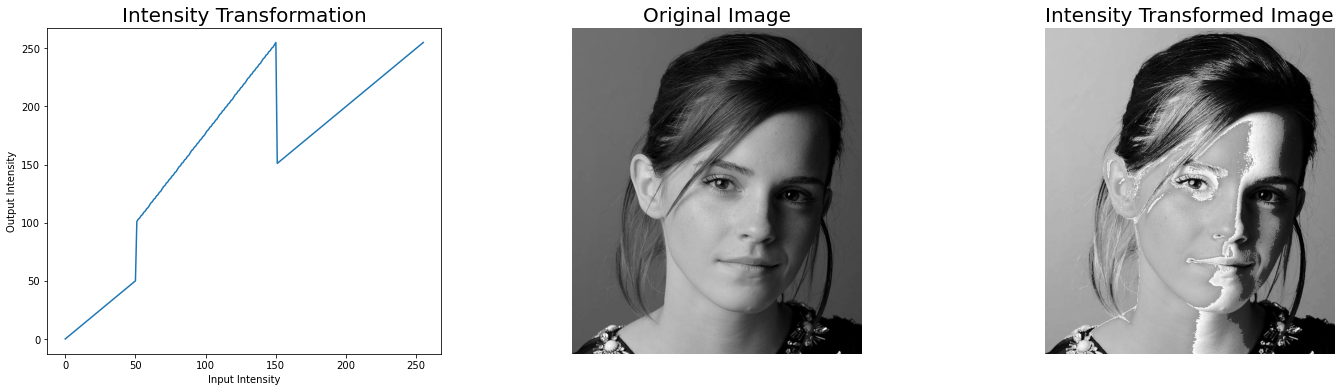

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

array_1 = np.array([ i for i in range(0,51)])
array_2 = np.array([ (155 / 100) * (i - 50) + 100 for i in range(51,151)])
array_3 = np.array([i for i in range(151,256)])
transform = np.concatenate((array_1, array_2, array_3),axis=0).astype(np.uint8)

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None

transformed_image = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(transform)
ax[0].set_title("Intensity Transformation", fontsize=20)
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")

ax[1].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Original Image", fontsize=20)
ax[2].imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Intensity Transformed Image", fontsize=20)
for i in range(1,3):
    ax[i].axis("off")
plt.savefig("q1.png")
plt.show()


**Discussion** : We can see that, in this transformation function, pixels with intensity values between 50 and 150, are increased but other intensities are not changed. We can see this result in the above-transformed image. The intensities of gray pixels of the original image are increased so that we can see a clear white region on her face. But dark and white pixels are not changed.

### Question 02

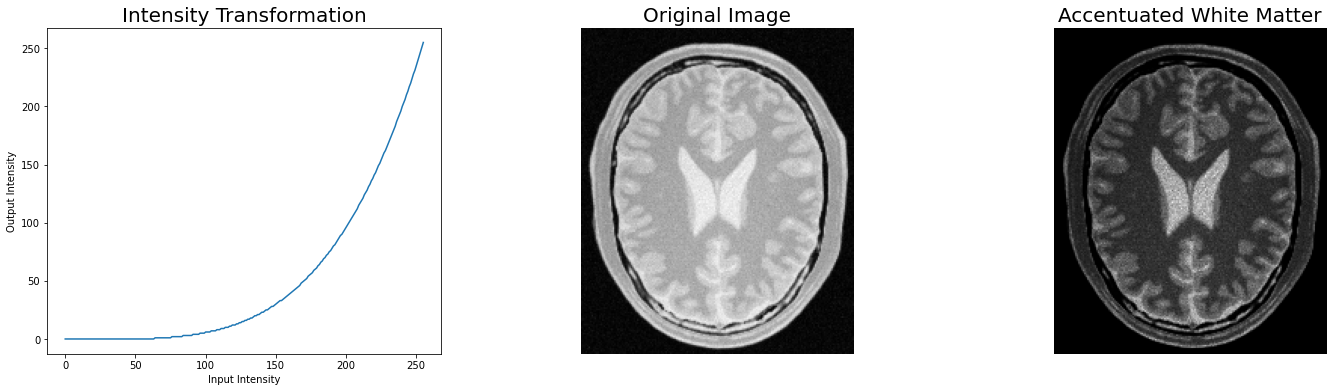

In [7]:
im = cv.imread(r"brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

white_transform = np.array([((i / 255) ** 4) * 255 for i in range(0,256)],dtype=np.uint8)
white_transformed_image = cv.LUT(im, white_transform)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(white_transform)
ax[0].set_title("Intensity Transformation", fontsize=20)
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[1].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Original Image", fontsize=20)
ax[2].imshow(white_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Accentuated White Matter", fontsize=20)
for i in range(1,3):
    ax[i].axis("off")
plt.savefig("q2.png")
plt.show()

**Discussion** : In this transformation, we can see that a wide range of dark pixels are mapped into a narrow range of dark pixels and a narrow range of white pixels are mapped into a wide range of white pixels. Therefore, we can see that the details of white matter are more highlighted compared to gray matter. We can extract more information about white matters.

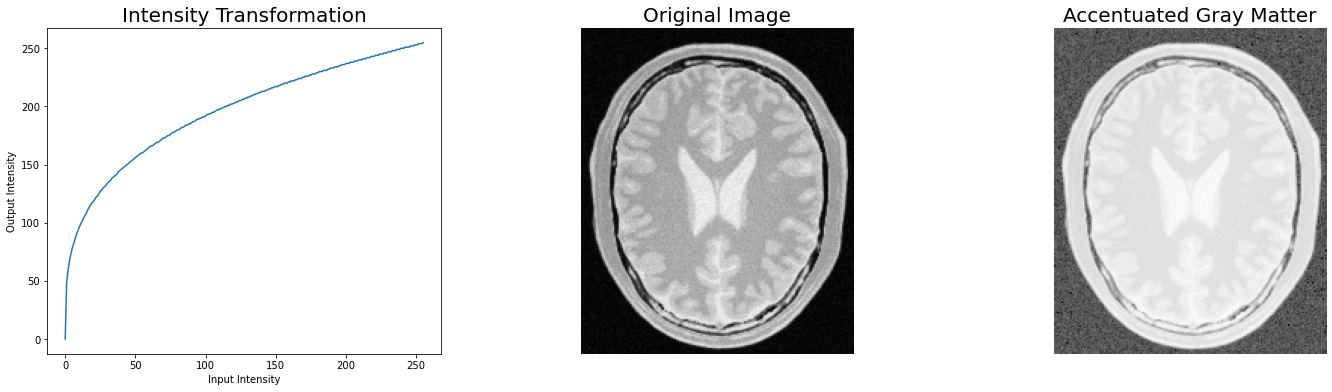

In [6]:
gray_transform = np.array([((i / 255) ** 0.3) * 255 for i in range(0,256)],dtype=np.uint8)
gray_transformed_image = cv.LUT(im, gray_transform)


fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(gray_transform)
ax[0].set_title("Intensity Transformation", fontsize=20)
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[1].imshow(im, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Original Image", fontsize=20)
ax[2].imshow(gray_transformed_image, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Accentuated Gray Matter", fontsize=20)
for i in range(1,3):
    ax[i].axis("off")
plt.savefig("q22.png")
plt.show()

**Discussion** : In this transformation, we can see that a narrow range of dark pixels are mapped into a wide range of white pixels and a wide range of white pixels are mapped into a narrow range of white pixels. Therefore, we can see that the details of gray matter are more highlighted compared to white matter. We can extract more information about gray matters.

### Question 03

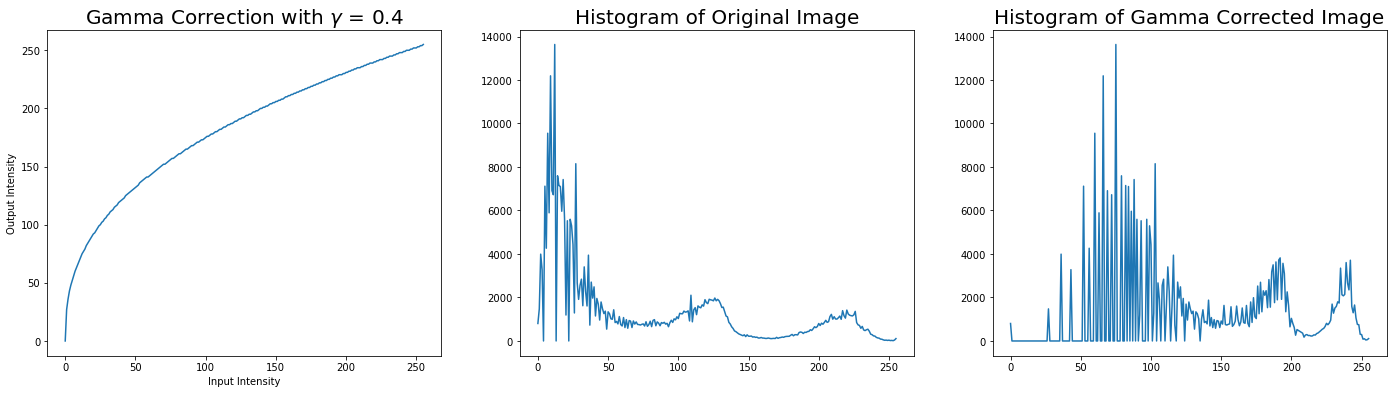

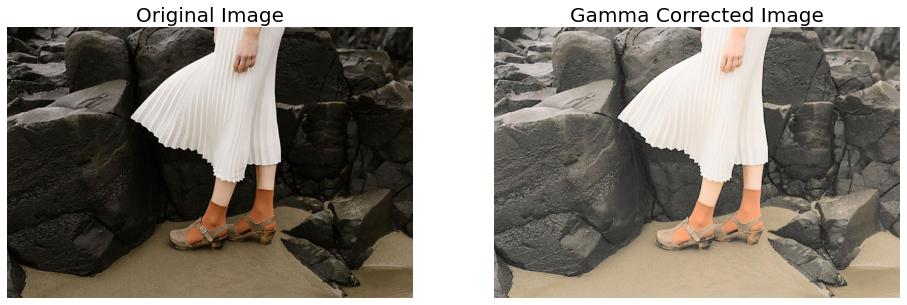

In [10]:
im = cv.imread(r"highlights_and_shadows.jpg")
assert im is not None

LAB_image = cv.cvtColor(im, cv.COLOR_BGR2LAB)
original_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])
gamma = 0.4
gamma_correction = np.array([((i / 255) ** gamma) * 255 for i in range(0,256)],dtype=np.uint8)
LAB_image[:, :, 0] = cv.LUT(LAB_image[:, :, 0], gamma_correction)

corrected_hist = cv.calcHist([LAB_image], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1, 3, figsize=(24,6))
ax[0].plot(gamma_correction)
ax[0].set_title("Gamma Correction with $\gamma$ = {}".format(gamma), fontsize=20)
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[1].plot(original_hist)
ax[1].set_title("Histogram of Original Image", fontsize=20)
ax[2].plot(corrected_hist)
ax[2].set_title("Histogram of Gamma Corrected Image", fontsize=20)
plt.savefig("q31.png")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image", fontsize=20)
ax[0].axis("off")
ax[1].imshow(cv.cvtColor(LAB_image, cv.COLOR_LAB2RGB))
ax[1].set_title("Gamma Corrected Image", fontsize=20)
ax[1].axis("off")
plt.savefig("q32.png")
plt.show()

**Discussion** : In the L\*a\*b color space, L stands for Lightness. When we apply gamma correction with $\gamma = 0.4$, the lightness of dark pixels, as well as light pixels, gets increased. Therefore, we can see the overall enhancement of the lightness of the above image.

This can be also verified by the histogram plots. We can see in the original image, the histogram of the L plane is more concentrated on the dark region. When applying a gamma correction to the L plane, the histogram is shifted to the right side as well as spread. This means the lightness of the image is increased.

### Question 04

**Explanation** : First we get the histogram of the image. Then we get the cumulative sum array of the histogram. Then we divide the cumulative sum array by the total pixels to get the normalized histogram.

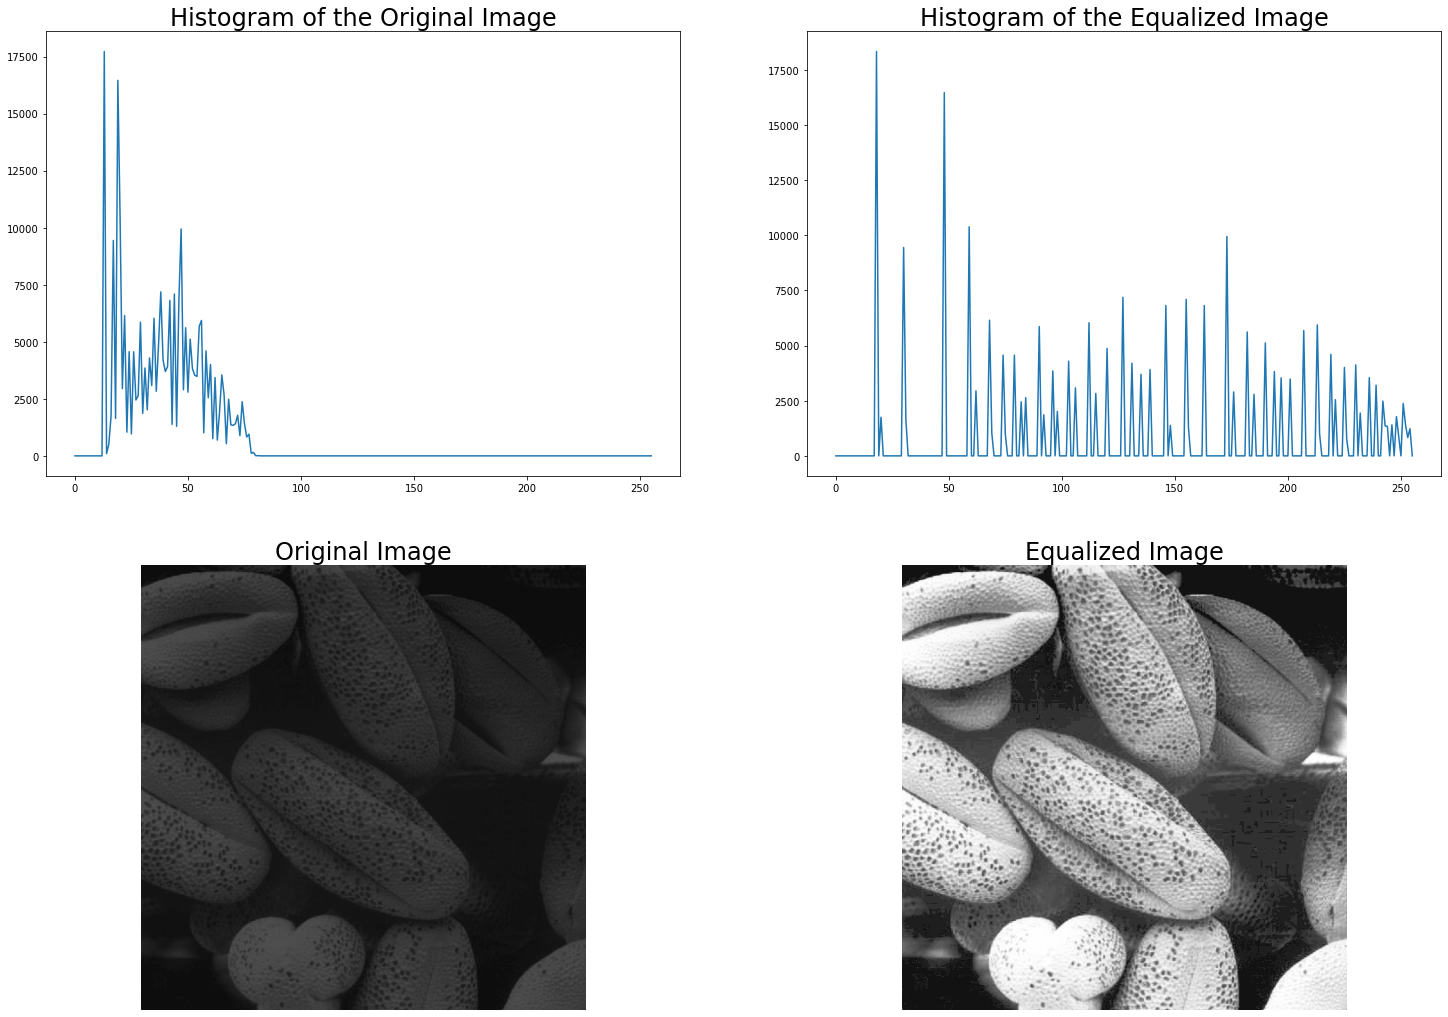

In [14]:
img = cv.imread(r"shells.png", cv.IMREAD_GRAYSCALE)
assert im is not None

original_hist = cv.calcHist([img], [0], None, [256], [0, 256])
cdf = original_hist.cumsum()
MN = img.shape[0] * img.shape[1]
equalize_transformation = np.array((cdf * 255) / MN, dtype=np.uint8)
equalize_img = cv.LUT(img, equalize_transformation)
equalize_hist = cv.calcHist([equalize_img], [0], None, [256], [0, 256])


fig, ax = plt.subplots(2, 2, figsize=(25,18))
ax[0, 0].plot(original_hist)
ax[0, 0].set_title("Histogram of the Original Image", fontsize=24)
ax[0, 1].plot(equalize_hist)
ax[0, 1].set_title("Histogram of the Equalized Image", fontsize=24)
ax[1, 0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[1, 0].set_title("Original Image", fontsize=24)
ax[1, 0].axis("off")
ax[1, 1].imshow(equalize_img, cmap="gray", vmin=0, vmax=255)
ax[1, 1].set_title("Equalized Image", fontsize=24)
ax[1, 1].axis("off")
plt.savefig("q4.png")
plt.show()


**Discussion** : We can see the histogram of the original image is more concentrated on the left side. i.e. it has more dark pixels. When applying histogram equalization, we get a more spread version of the histogram. We can see this enhancement from the above images. In the original image, the contrast is very low. We cannot get any details from it. But the equalized image has more contrast. This means we can get more details/information about the original image.

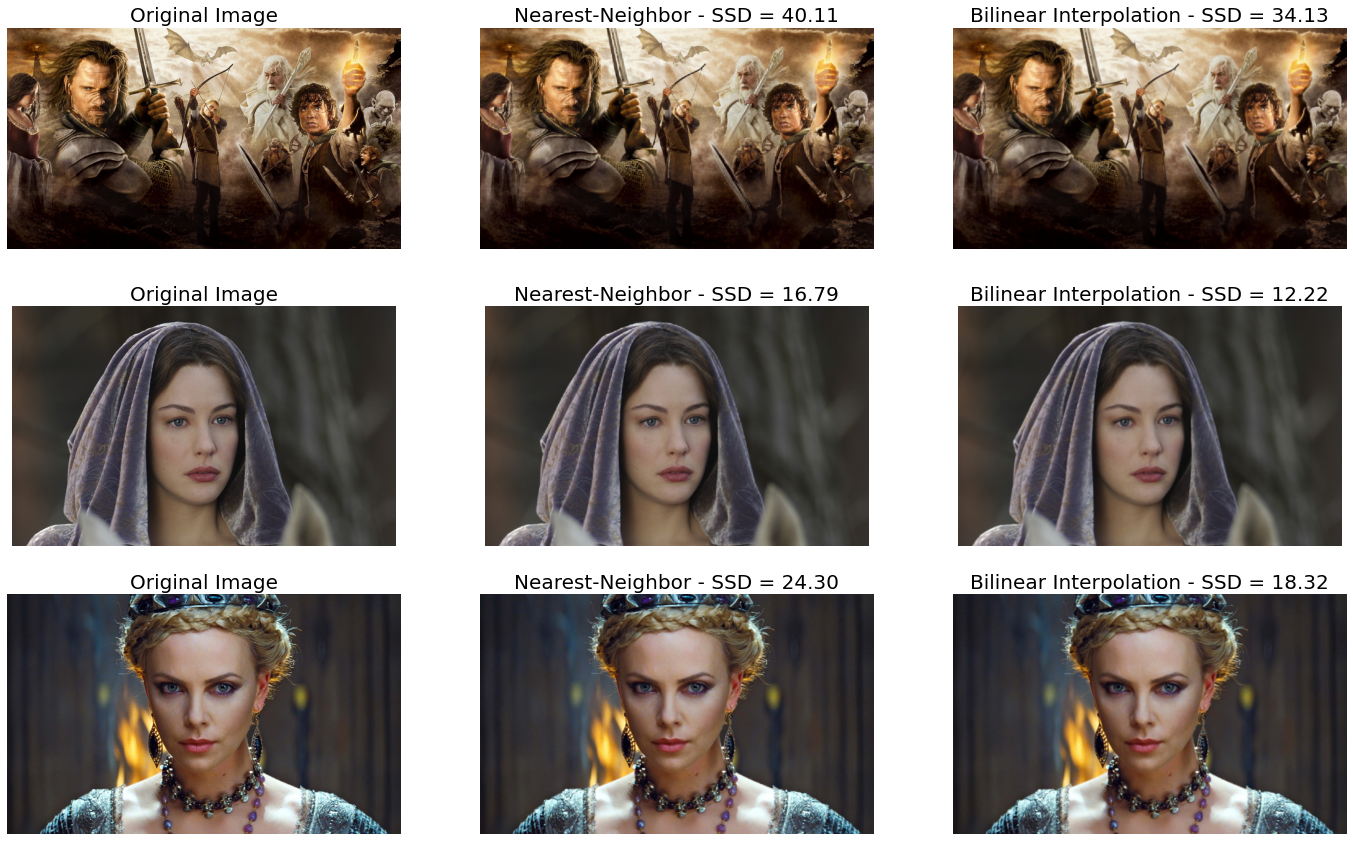

In [17]:
import math
def nearestNeighborInterpolation(img, scale):
    scaled_dimentions = (round(img.shape[0] * scale), round(img.shape[1] * scale), img.shape[2])
    scaled_img = np.zeros(scaled_dimentions,dtype=np.uint8)
    for i in range(scaled_dimentions[0]):
        for j in range(scaled_dimentions[1]):
            scaled_img[i, j] = img[min(round(i / scale), img.shape[0] - 1), min(round(j / scale), img.shape[1] - 1)]
    return scaled_img

def bilinearInterpolation(img, scale):
    scaled_dimentions = (round(img.shape[0] * scale), round(img.shape[1] * scale), img.shape[2])
    scaled_img = np.zeros(scaled_dimentions,dtype=np.uint8)
    y_ratio = (img.shape[1] - 1) / (scaled_dimentions[1] - 1)
    x_ratio = (img.shape[0] - 1) / (scaled_dimentions[0] - 1)
    for i in range(scaled_dimentions[0]):
        for j in range(scaled_dimentions[1]):
            y_floor = math.floor(j * y_ratio)
            y_ceil = min(math.ceil(j * y_ratio), img.shape[1] - 1)
            x_floor = math.floor(i * x_ratio)
            x_ceil = min(math.ceil(i * x_ratio), img.shape[0] - 1)

            y_weight = (j * y_ratio) - y_floor
            x_weight = (i * x_ratio) - x_floor

            pixel_value = img[x_floor, y_floor] * (1 - y_weight) * (1 - x_weight) + \
                img[x_ceil, y_floor] * (1 - y_weight) * (x_weight) + \
                    img[x_floor, y_ceil] * (y_weight) * (1 - x_weight) + \
                        img[x_ceil, y_ceil] * (y_weight) * (x_weight)
            
            scaled_img[i, j] = pixel_value
            
    return scaled_img

def SSD(img1, img2):
    return (np.power((img1 - img2), 2)).sum() / (img1.size)

fig, ax = plt.subplots(3, 3, figsize=(24, 15))
for i in range(3):
    orig_img = cv.imread("a1q5images/a1q5images/im0{}.png".format(i+1))
    orig_small_img = cv.imread("a1q5images/a1q5images/im0{}small.png".format(i+1))
    assert orig_small_img is not None
    nn_zoomed_img = nearestNeighborInterpolation(orig_small_img, 4)
    bi_zoomed_img = bilinearInterpolation(orig_small_img, 4)
    ax[i, 0].imshow(cv.cvtColor(orig_img, cv.COLOR_BGR2RGB))
    ax[i, 0].set_title("Original Image", fontsize=20)
    ax[i, 1].imshow(cv.cvtColor(nn_zoomed_img, cv.COLOR_BGR2RGB))
    ax[i, 1].set_title("Nearest-Neighbor - SSD = {:.2f}".format(SSD(nn_zoomed_img, orig_img)), fontsize=20)
    ax[i, 2].imshow(cv.cvtColor(bi_zoomed_img, cv.COLOR_BGR2RGB))
    ax[i, 2].set_title("Bilinear Interpolation - SSD = {:.2f}".format(SSD(bi_zoomed_img, orig_img)), fontsize=20)
    for j in range(3):
        ax[i, j].axis("off")
plt.savefig("q5.png")
plt.show()

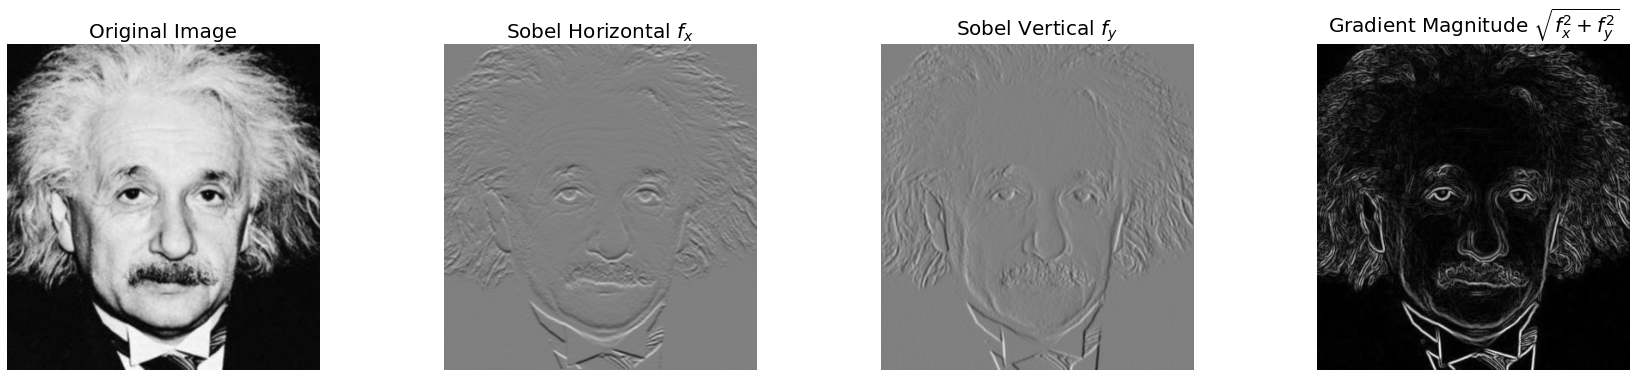

In [20]:
img = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
f_x = cv.filter2D(img, -1, sobel_v_kernel)
sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(img, -1, sobel_h_kernel)
grad_mag_img = np.sqrt(f_x**2 + f_y**2)


fig, ax = plt.subplots(1, 4, figsize=(30, 6))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image", fontsize=20)
ax[1].imshow(f_x, cmap="gray", vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel Horizontal $f_x$", fontsize=20)
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020)
ax[2].set_title(r"Sobel Vertical $f_y$", fontsize=20)
ax[3].imshow(grad_mag_img, cmap="gray")
ax[3].set_title(r"Gradient Magnitude $\sqrt{f_x^2+f_y^2}$", fontsize=20)
for i in range(4):
    ax[i].axis("off")
plt.savefig("q61.png")
plt.show()


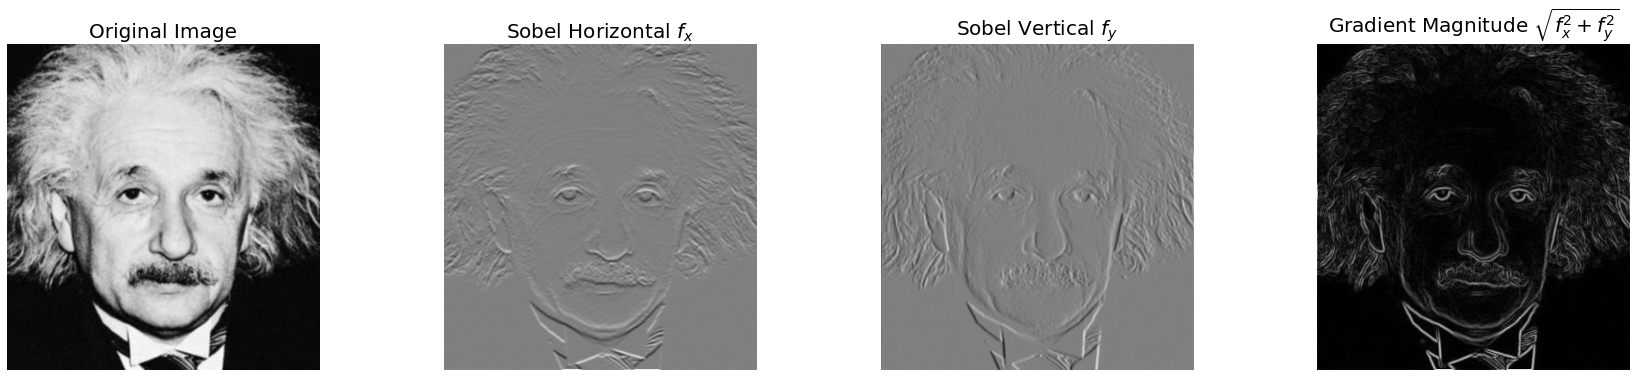

In [21]:
def spacial_filter(img, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    kernel = np.rot90(np.rot90(kernel)) # rotate 180 for convolution
    v_padding = int(kernel.shape[0] / 2)
    h_padding = int(kernel.shape[1] / 2)
    padded_img = np.zeros((img.shape[0] + 2 * v_padding, img.shape[1] + 2 * h_padding ), dtype=np.float32)
    padded_img[v_padding:padded_img.shape[0] - v_padding, h_padding:padded_img.shape[1] - h_padding] = img
    filtered_image = np.zeros(img.shape, dtype=np.float32)
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            filtered_image[i, j] = (kernel * padded_img[i: i + kernel.shape[0], j: j + kernel.shape[1]]).sum()
    return filtered_image

f_x = spacial_filter(img, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32))
f_y = spacial_filter(img, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32))
grad_mag_img = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1, 4, figsize=(30, 6))

ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image", fontsize=20)
ax[1].imshow(f_x, cmap="gray", vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel Horizontal $f_x$", fontsize=20)
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020)
ax[2].set_title(r"Sobel Vertical $f_y$", fontsize=20)
ax[3].imshow(grad_mag_img, cmap="gray")
ax[3].set_title(r"Gradient Magnitude $\sqrt{f_x^2+f_y^2}$", fontsize=20)
for i in range(4):
    ax[i].axis("off")
plt.savefig("q62.png")
plt.show()

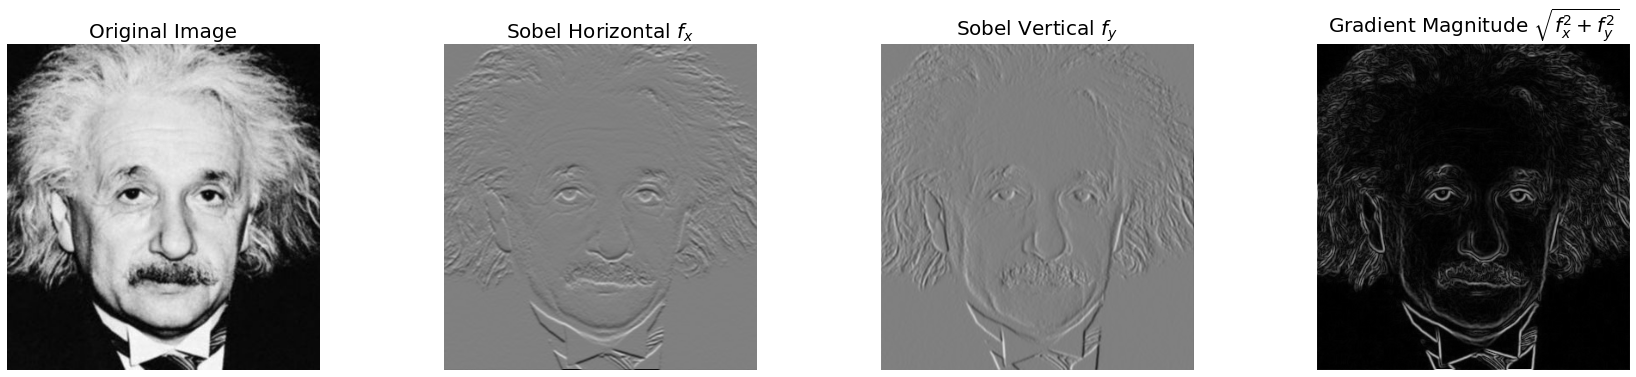

In [23]:
f_y = spacial_filter(img, np.array([[1], [2], [1]], dtype=np.float32))
f_y = spacial_filter(f_y, np.array([[1, 0, -1]], dtype=np.float32))

f_x = spacial_filter(img, np.array([[1], [0], [-1]], dtype=np.float32))
f_x = spacial_filter(f_x, np.array([[1, 2, 1]], dtype=np.float32))
grad_mag_img = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1, 4, figsize=(30, 6))

ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original Image", fontsize=20)
ax[1].imshow(f_x, cmap="gray", vmin=-1020, vmax=1020)
ax[1].set_title(r"Sobel Horizontal $f_x$", fontsize=20)
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020)
ax[2].set_title(r"Sobel Vertical $f_y$", fontsize=20)
ax[3].imshow(grad_mag_img, cmap="gray")
ax[3].set_title(r"Gradient Magnitude $\sqrt{f_x^2+f_y^2}$", fontsize=20)
for i in range(4):
    ax[i].axis("off")
plt.savefig("q63.png")
plt.show()


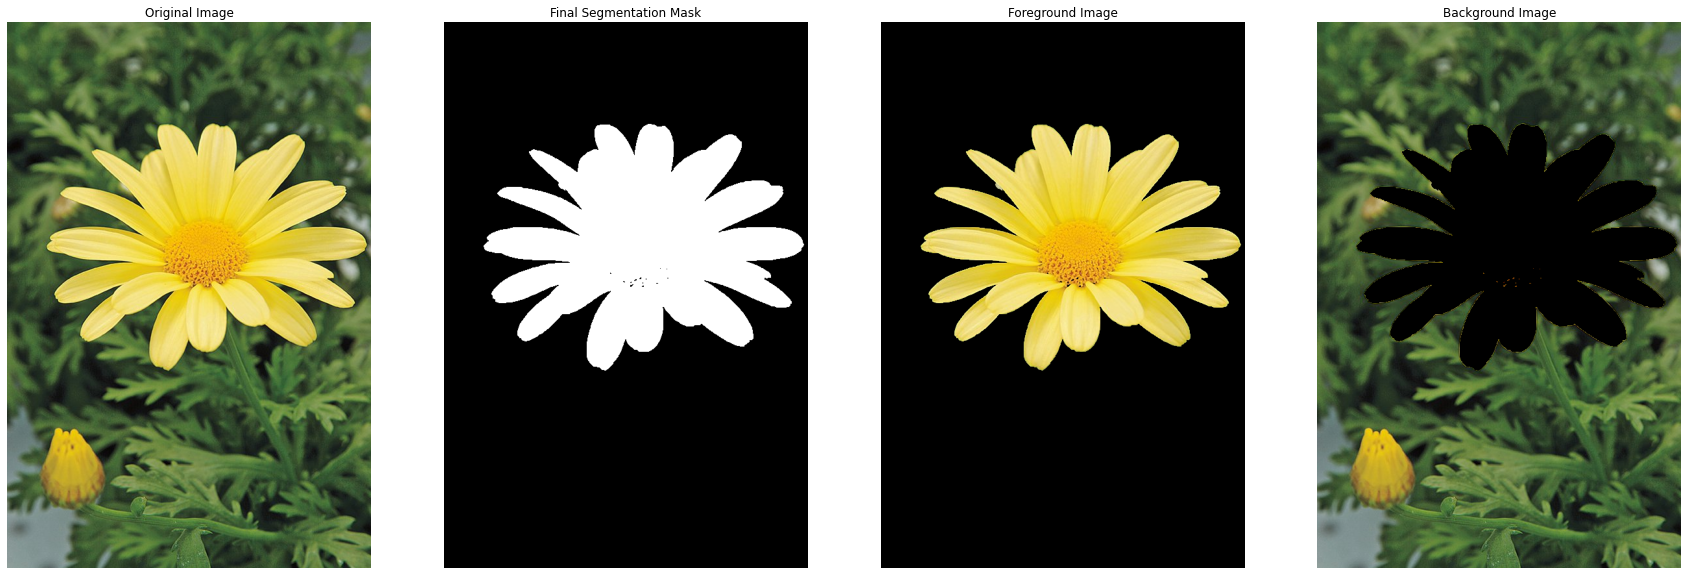

In [51]:
img = cv.imread(r"daisy.jpg")
assert im is not None

rect = (51,147,507,441)
mask = np.zeros(img.shape[:2], dtype=np.uint8)
x,y,w,h = rect
mask[y:y+h, x:x+w] = 1 

fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
cv.grabCut(img, mask, rect, bgModel,fgModel,iterCount=10, mode=cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype(np.uint8)
foreground_img = img*mask2[:, :, np.newaxis] 
background_img = img*(1 - mask2[:, :, np.newaxis])

fig, ax = plt.subplots(1, 4, figsize=(30, 18))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(mask2, cmap="gray")
ax[1].set_title("Final Segmentation Mask")
ax[2].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[3].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
for i in range(4):
    ax[i].axis("off")
plt.show()

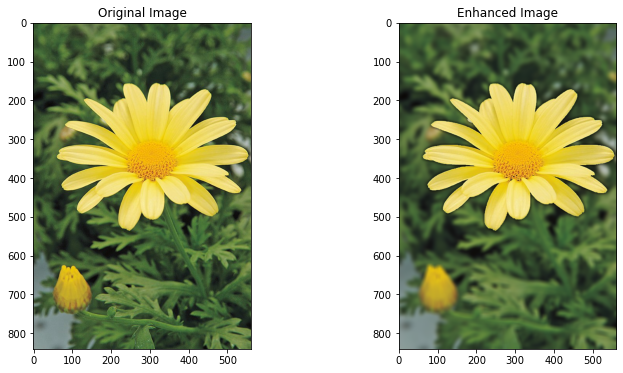

In [54]:
background_blurred_img = cv.GaussianBlur(background_img, (13, 13), 8)
enhanced_img = foreground_img + background_blurred_img*(1 - mask2[:, :, np.newaxis])
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
plt.show()